## Analysis of detector data - power spectral density
    * data has 4 channels from heterodyning - PSDs plotted 
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

#read in data
#skip the first 7 rows (preamble) and place the next 4000000 in a numpy array

#change the fname to the path of your data file

data43 = np.loadtxt(fname = 'dataFiles/run-43', skiprows = 7, max_rows = 4000000)




In [3]:
#time step (seconds)
dt = 0.01
#make a time series the same length as the read-in data
t_s = np.arange(0,len(data43)*dt,dt) 

(-10, 10)

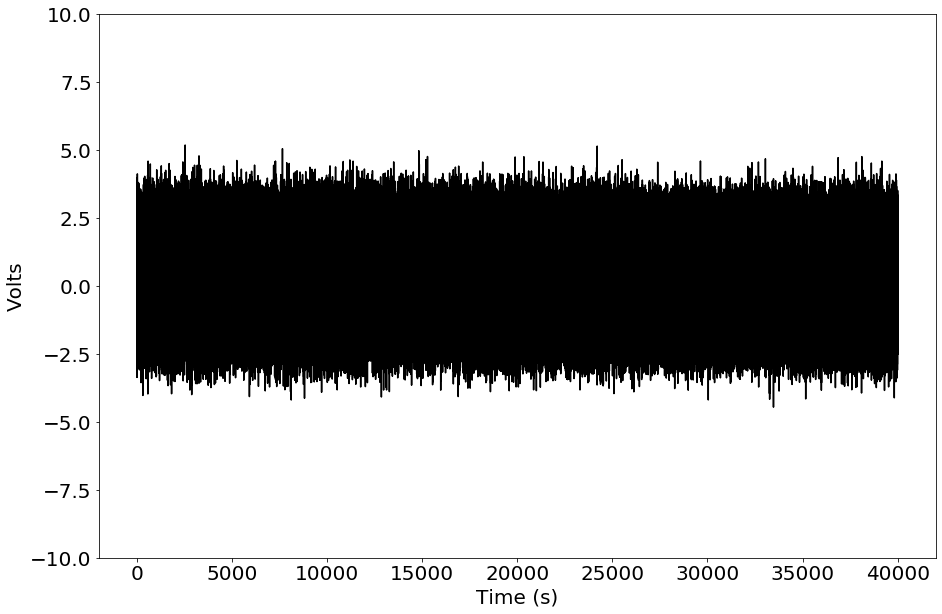

In [4]:
#now plot any column of the data in time domain
plt.figure(figsize=(15,10))


plt.plot(t_s,data43[:,2],'k')
plt.xlabel("Time (s)",fontsize=20)
plt.ylabel("Volts",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-10,10)


### PSD

/Users/niallgray/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


(0.3064781632409182, 40)

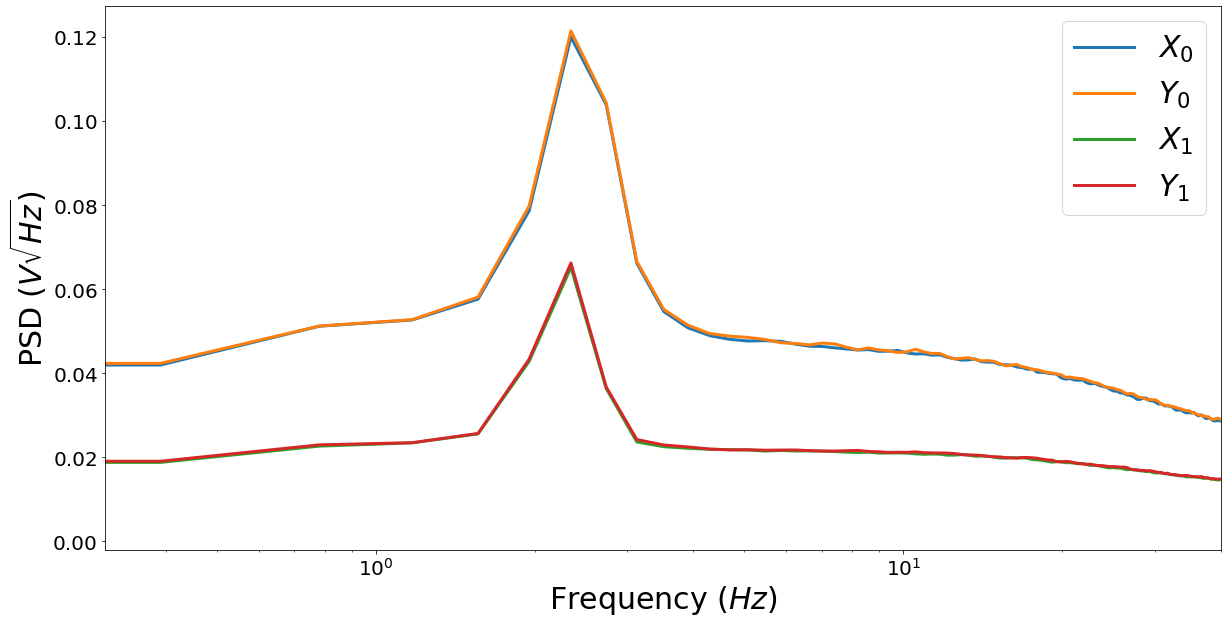

In [28]:
#use signal.welch to estimate power spectral density using Welch’s method
#freqs - Array of sample frequencies.
#psd - Power spectral density or power spectrum of x.

plt.figure(figsize=(20,10))



#make dicts for the output of the function
freqs = []
psd = []
for i in range(4):
    f , p = signal.welch(x = data43[:,i], fs = 1/dt)
    freqs.append(f)
    psd.append(p)
    #make y axis scale decibel volts dBV(sqrtHz)
    #p = 20*np.log10(p)
    plt.semilogx(f, p, linewidth =3) 
    
plt.xlabel(r'Frequency ($Hz$)',fontsize=30)
plt.ylabel(r'PSD ($V\sqrt{Hz}$)',fontsize=30)
plt.legend([r"$X_0$",r"$Y_0$",r"$X_1$",r"$Y_1$"],fontsize=30)
plt.rcParams["figure.figsize"] = (10,7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,40)




"A voltage decibel (dBV) is a unit of measurement of the ratio of an amount of voltage V to V0 = 1 volt given by the formula 20 log10(V/ V0) = 20 log10(V)."

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 <a list of 9 Text yticklabel objects>)

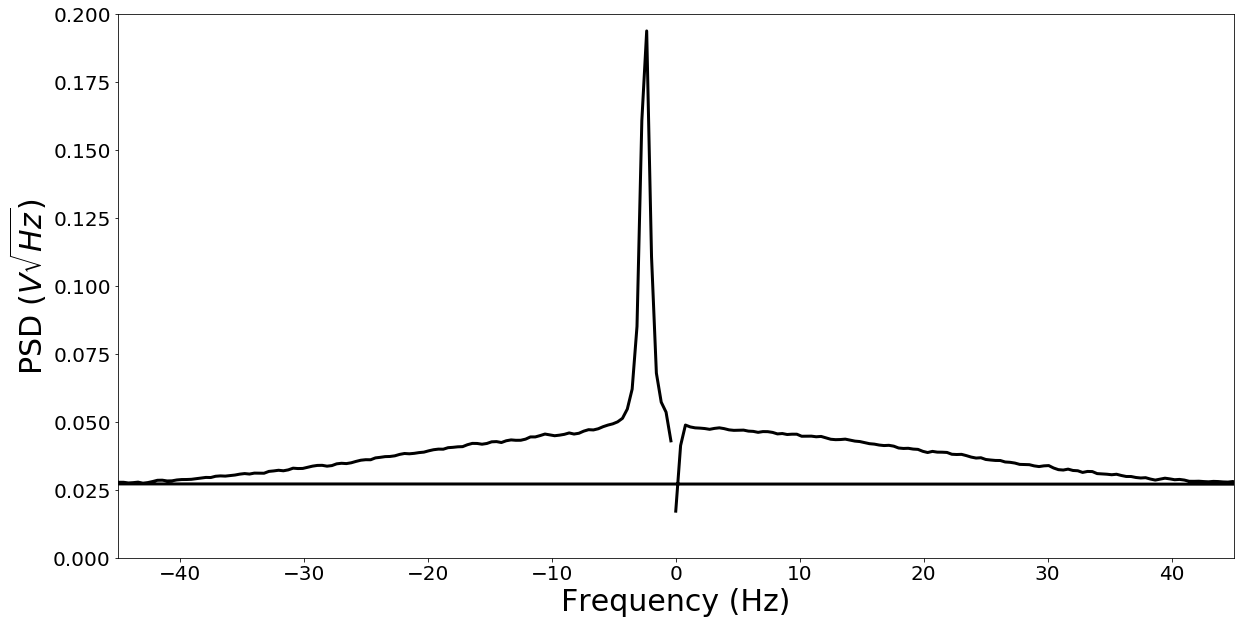

In [5]:
#2 sided psd with X+iY 
#Signal 0 with X0 and Y0
plt.figure(figsize=(20,10))



X0 = data43[:,0]
Y0 = data43[:,1]
iY0 = 1j*Y0
#combine x+iy to make complex signal
sig_0 = X0+iY0
#make psd
f_sig0 , p_sig0 = signal.welch(x = sig_0, fs = 1/dt, return_onesided = False)

plt.plot(f_sig0, p_sig0, 'k', linewidth = 3) 
plt.xlabel('Frequency (Hz)',fontsize=30)
plt.ylabel('PSD ($V\sqrt{Hz}$)',fontsize=30)
#plt.ylim(0,0.04)
plt.xlim(-45,45)
plt.ylim(0,0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 <a list of 9 Text yticklabel objects>)

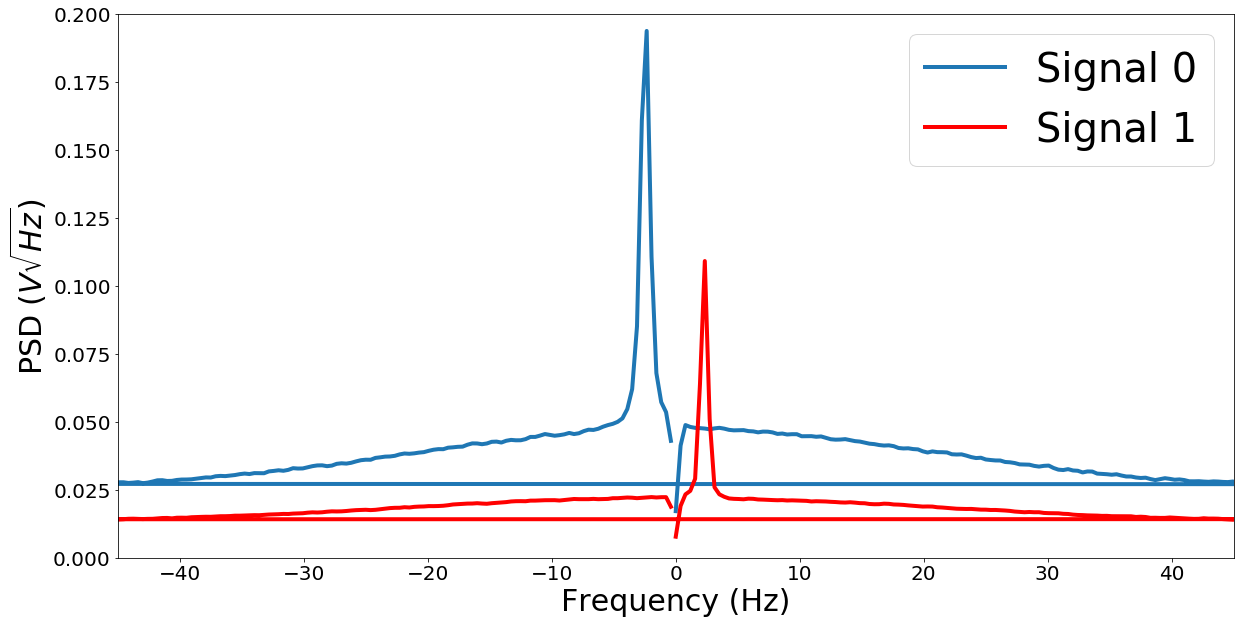

In [6]:
#2 sided PSD plots of sig 0 and sig 1
plt.figure(figsize=(20,10))

X1 = data43[:,2]
Y1 = data43[:,3]
iY1 = 1j*Y1
#combine x+iy to make complex signal
sig_1 = X1+iY1
#make psd
f_sig1 , p_sig1 = signal.welch(x = sig_1, fs = 1/dt, return_onesided = False)

plt.plot(f_sig0, p_sig0,  linewidth = 4) 
plt.plot(f_sig1, p_sig1, 'r', linewidth = 4) 
plt.xlabel('Frequency (Hz)',fontsize=30)
plt.ylabel('PSD ($V\sqrt{Hz}$)',fontsize=30)
plt.legend(["Signal 0", "Signal 1"],fontsize=40)

plt.xlim(-45,45)
plt.ylim(0,0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)